# Denver Colorado Maximum Annual Temperature from 1948-2024. 

## Data Source

This data[1] is drawn from The Global Historical Climatology Network - Daily (GHCN-Daily/GHCNd) dataset[2] which integrates daily climate observations from approximately 30 different land surface sources from around the world.

According to the National Centers for Environmental Information[2], "the dataset cannot be used to quantify all aspects of climate variability and change without any additional processing. In general, the stations providing daily observations were not managed to meet the desired standards for climate monitoring. Rather, the stations were deployed to meet the demands of agriculture, hydrology, weather forecasting, aviation, etc."

For this analysis I selected data station # USW00023062 located in Denver Central Park, Colorado. This station is the only one in the area with datasets going back over half a century, in this case to 1948. Unfortunately, the TOBS data had large gaps so I instead looked at the TMAX data for evidence of climate change.

[1]:  Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3, Denver Central Park, CO, Station USW00023062. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [accessed Sept 23, 2024].

[2]:  https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html "National Centers for Environmental Information Website"

In [2]:
# Import required packages
import pandas as pd

In [3]:
denver_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=TMAX,PRCP&stations=USW00023062'
    '&startDate=1948-01-01'
    '&endDate=2024-09-10'
    '&units=standard')
denver_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX,PRCP&stations=USW00023062&startDate=1948-01-01&endDate=2024-09-10&units=standard'

In [4]:
# Import data into Python from NCEI API
pd.read_csv(
    denver_url,
    index_col='DATE',
    parse_dates=True)

,STATION,PRCP,TMAX
DATE,,,
1948-01-01,USW00023062,0.0,43.0
1948-01-02,USW00023062,0.0,47.0
1948-01-03,USW00023062,0.0,56.0
1948-01-04,USW00023062,0.0,57.0
1948-01-05,USW00023062,0.0,53.0
...,...,...,...
2024-08-31,USW00023062,0.0,87.0
2024-09-02,USW00023062,0.0,87.0
2024-09-03,USW00023062,0.0,91.0


In [5]:
# Download the climate data
denver_df = pd.read_csv(
    denver_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
denver_df

,STATION,PRCP,TMAX
DATE,,,
1948-01-01,USW00023062,0.0,43.0
1948-01-02,USW00023062,0.0,47.0
1948-01-03,USW00023062,0.0,56.0
1948-01-04,USW00023062,0.0,57.0
1948-01-05,USW00023062,0.0,53.0
...,...,...,...
2024-08-31,USW00023062,0.0,87.0
2024-09-02,USW00023062,0.0,87.0
2024-09-03,USW00023062,0.0,91.0


### Data Cleanup

Below, I am specifying the specific data I want to examine, in this case the maximum temperatures. 

In [6]:
denver_df = denver_df[['TMAX']]
denver_df

,TMAX
DATE,
1948-01-01,43.0
1948-01-02,47.0
1948-01-03,56.0
1948-01-04,57.0
1948-01-05,53.0
...,...
2024-08-31,87.0
2024-09-02,87.0
2024-09-03,91.0


### Add Correct Units to the Data

Data was downloaded in the 'standard' format where temperatures are recorded in degrees Fahrenheit.

In [7]:
denver_df_u = denver_df.rename(columns={
    'TMAX': 'TMAX_F',
})
denver_df_u

,TMAX_F
DATE,
1948-01-01,43.0
1948-01-02,47.0
1948-01-03,56.0
1948-01-04,57.0
1948-01-05,53.0
...,...
2024-08-31,87.0
2024-09-02,87.0
2024-09-03,91.0


### Plot the Results

In [8]:
import holoviews as hv
import hvplot.pandas

<Axes: xlabel='DATE'>

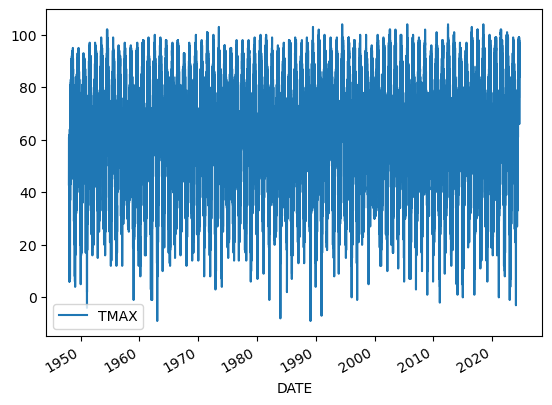

In [9]:
denver_df.plot()

<Axes: title={'center': 'Maximum Temp in Denver, CO between 1948 and 2024'}, xlabel='Year', ylabel='Temperature (F)'>

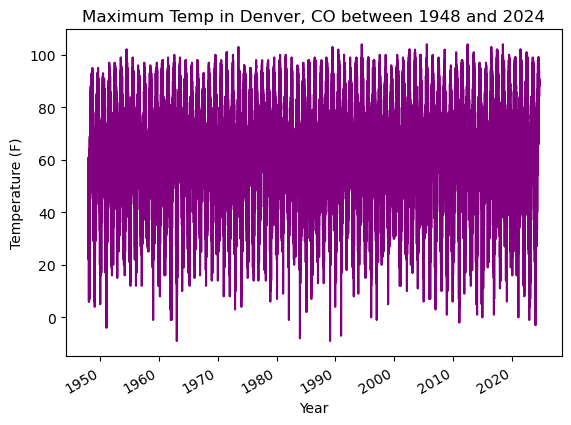

In [10]:
# Plot the data using .plot
denver_df.plot(
    y='TMAX',
    title='Maximum Temp in Denver, CO between 1948 and 2024',
    xlabel='Year',
    ylabel='Temperature (F)',
    legend=False,
    fontsize=10,
    color='purple',
    )


##Resample Data 
I resampled the data from the start of each year, selecting only the maximum temperature. This will make any visuals easier to read.

In [11]:
# Clean up data by changing it to Annual Average 
ann_denver_df = denver_df.resample('YS').max()
ann_denver_df


,TMAX
DATE,
1948-01-01,95.0
1949-01-01,95.0
1950-01-01,93.0
1951-01-01,97.0
1952-01-01,97.0
...,...
2020-01-01,99.0
2021-01-01,102.0
2022-01-01,101.0


<Axes: title={'center': 'Maximum Temperature in Denver, CO between 1948 and 2024'}, xlabel='Year', ylabel='Temperature (F)'>

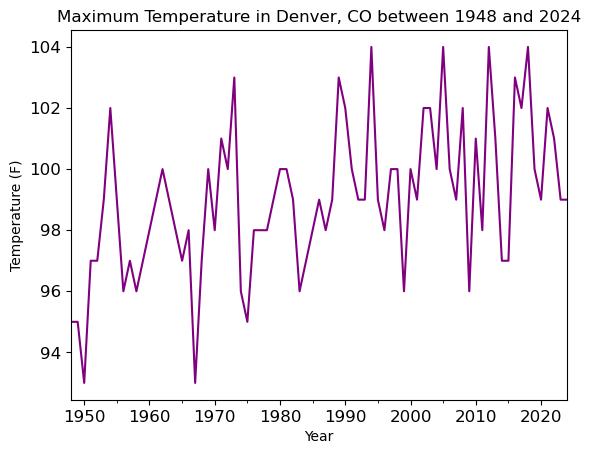

In [12]:
# Plot the annual data

ann_denver_df.plot(
    y='TMAX',
    title='Maximum Temperature in Denver, CO between 1948 and 2024',
    xlabel='Year',
    ylabel='Temperature (F)',
    legend=False,
    fontsize=12,
    color='purple',
)

In [13]:
# Plot the annual data interactively
ann_temp_plot = ann_denver_df.hvplot(
    y='TMAX',
    title='Yearly High Temperature in Denver, CO (1948 and 2024)',
    xlabel='Year',
    ylabel='Temperature (F)',
    legend=False,
    fontsize=12,
    color='purple',
)
ann_temp_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (TMAX)

## Hight Temperature trend line for Denver, CO (1948-2024)

In [14]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

The sample data indicated that there was a 100% complete dataset for TMAX. However, I added a filter to exclude years that had less than 99% complete data. This will exclude the partial year of 2024.

In [15]:
include = denver_df.TMAX.resample('YS').count() / 365 > .99

<Axes: xlabel='DATE'>

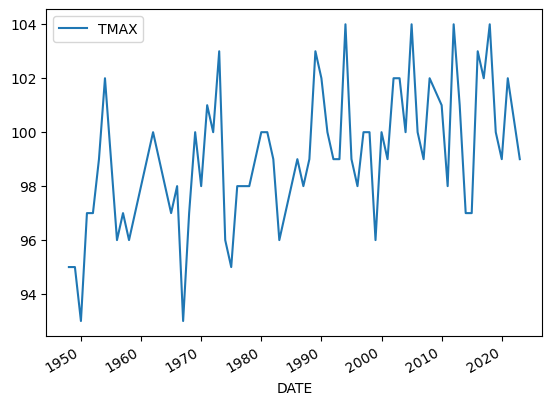

In [16]:
from sklearn.linear_model import LinearRegression
import pandas as pd
ann_denver_df = (
    ann_denver_df
    [include]
    .dropna()
)
ann_denver_df.plot(y='TMAX')

In [25]:
# Reset index to make 'Year' a column if it's currently the index
ann_denver_df = ann_denver_df.reset_index()

# Define the independent variable (X) and the dependent variable (y)
x = ann_denver_df[['DATE']]  # X should be 2D, so use double brackets
y = ann_denver_df['TMAX']

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 1.8797414034823905e-18
Intercept: 98.16919736626025


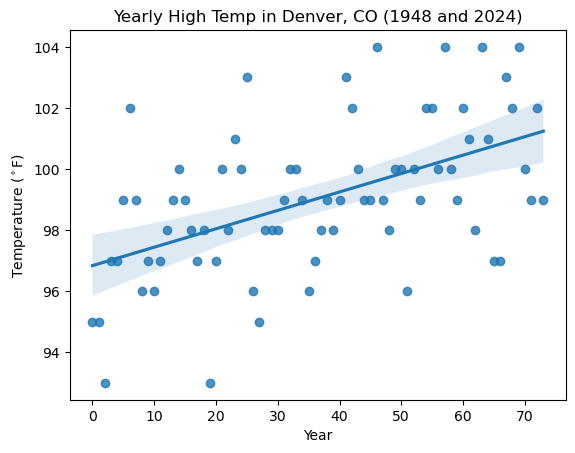

In [32]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=ann_denver_df.index, 
    y=ann_denver_df.TMAX,
    )
# Set plot labels
ax.set(
    title='Yearly High Temp in Denver, CO (1948 and 2024)',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)
# Display the plot without extra text
plt.show()

This models shows a slight but clear trend upwards in terms of the highest annual temperature in Denver Colorado during the past 70 years. While not strictly linear, the trend indicates a tendency toward higher max temperatures. The next step would be to repeat this analysis with TMIN to see if the minimum temperatures are also rising or if weather is become more extreme in terms of both hot and cold. 
